In [ ]:
#Requirements
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install peakutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import required libraries:

In [1]:
#import libraries in environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


Read the xrd data by pandas

In [188]:
data = pd.read_csv('G:\msc project sources\XRD\Group 1 - Zinc Powder.csv')
data


,Angle (2theta),Intensity (Counts)
0,20.03,1
1,20.09,1
2,20.15,1
3,20.21,3
4,20.27,2
...,...,...
912,74.75,4
913,74.81,3
914,74.87,1
915,74.93,2


Collecting information about dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Angle (2theta)      917 non-null    float64
 1   Intensity (Counts)  917 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.5 KB


In [5]:
#checking the data to filter out null spaces
data.isnull().sum()

Angle (2theta)        0
Intensity (Counts)    0
dtype: int64

In [6]:
#setup data type as float for theta values to avoid errors in mathematical ops.
data['Angle (2theta)'] = data['Angle (2theta)'].astype('float')

plot XRD data Intensity vs 2-Theta

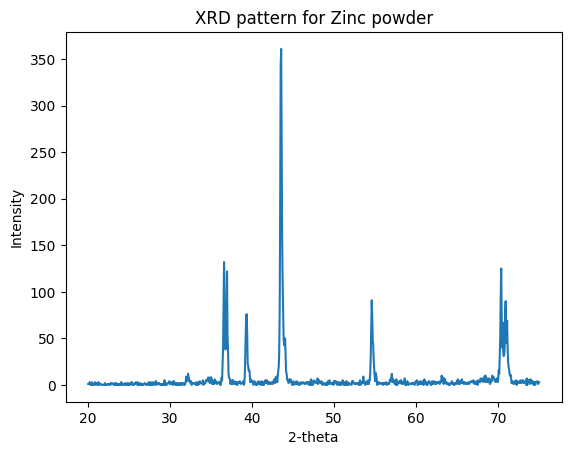

In [7]:
x=data['Angle (2theta)']
y=data['Intensity (Counts)']
plt.plot(data['Angle (2theta)'], data['Intensity (Counts)'])
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.title('XRD pattern for Zinc powder')
plt.show()

In [9]:
#to detect the maximum intensity peaks
peaks, _ = find_peaks(data['Intensity (Counts)'], height=60, distance=5)


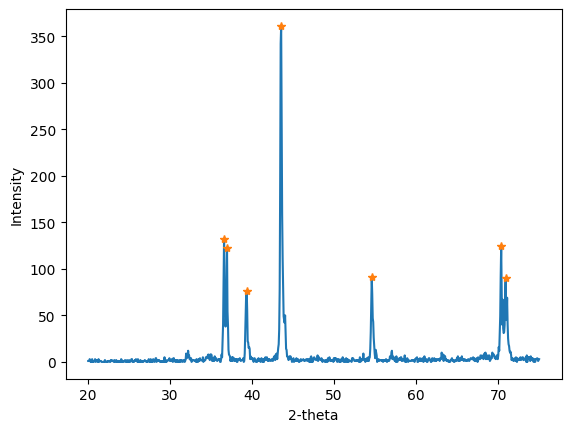

In [10]:
#mark the detected peak and plot data
plt.plot(data['Angle (2theta)'], data['Intensity (Counts)'])
plt.plot(data['Angle (2theta)'][peaks], data['Intensity (Counts)'][peaks], '*')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.show()

Save the 2-theta values of detected peaks:

In [11]:
# Save the coordinates of the detected peaks in a new file

peak_coords = np.column_stack((x[peaks], y[peaks])).astype(float)
np.savetxt('peak_file.csv', peak_coords, delimiter=',', header='Theta,Intensity', comments='')

# Show the plot

plt.show()
#detection of Theta w.r.t detected peak

Read the detected peak 2-theta values and save for further ops:

In [134]:
detected_peak=pd.read_csv('peak_file.csv')
x1=detected_peak['Theta'].tolist()
y1=detected_peak['Intensity'].tolist()

Read the jcpds data:

In [201]:
jcpds_data=pd.read_csv('G:\msc project sources\XRD\zinc powder.csv', encoding='unicode_escape')
#Theta=detected_peak.iloc.drop('Intensity',axis=1,inplace=False

# drop the column at index 1 (i.e. 'age' column) from the dataframe
jcpds_data1 = jcpds_data.drop(jcpds_data.columns[[2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,20,21]], axis=1)

x=jcpds_data.iloc[:,1].tolist()  #jspds_theta
y=jcpds_data.iloc[:,15].tolist()  #jcpds intensity
# print the resulting dataframe
jcpds_data1



,No.,Pos. [°2Th.],d-spacing [Å],Rel. Int. [%]
0,1,36.6591,2.44942,24.10
1,2,36.8004,2.44640,29.86
2,3,39.3476,2.28803,20.52
3,4,43.5474,2.07661,100.00
4,5,54.6254,1.67877,23.00
5,6,70.3455,1.33722,29.03
6,7,70.8643,1.32870,23.40


Comparison of jcpds data with experimetal data

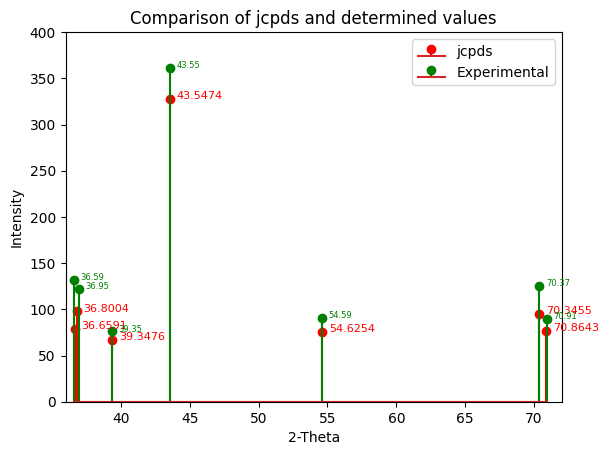

In [202]:
# Plot the data
plt.stem(x,y,'ro',label='jcpds')
plt.stem(x1,y1,'green',label='Experimental')

# Add x-coordinate values to the peak right
for i, j in zip(x, y):
    plt.annotate(str(i), xy=(i, j), xytext=(5, 0), textcoords="offset points", ha='left', fontsize=8, color='red')

for i, j in zip(x1, y1):
    plt.annotate(str(i), xy=(i, j), xytext=(5, 0), textcoords="offset points", ha='left', fontsize=6, color='green')

# Add legend
plt.legend()

# Set x-axis and y-axis limits
plt.xlim(36,72)
plt.ylim(0,400)

plt.xlabel('2-Theta')
plt.ylabel('Intensity')
# Add title to the figure
plt.title('Comparison of jcpds and determined values')

# Display the plot
plt.show()


Calculation for d_spacing for detected peak theta value

In [206]:
# max_indices = np.argmax(data['Intensity (Counts)'])
# max_2theta = data['Angle (2theta)'][max_indices]
wavelength = 1.5406  # Cu K-alpha radiation
value=Theta['Theta'].to_numpy()#[36.59, 36.95, 39.35, 43.55, 54.59, 70.37, 70.91]
print("{0} \t {1} ".format("2theta","d-spacing"))
d_list=[]
theta_list=[]
for i in value:
  theta=i/2
  #theta = 70.91 / 2
  d_spacing = wavelength / (2 * np.sin(np.deg2rad(theta)))     #brags law
  d_list.append(d_spacing)
  theta_list.append(i)

  #print("{0}   {1}   ".format(i,d_spacing))

d_data={'2-Theta':theta_list,'d-spacing':d_list} 
dd=pd.DataFrame(d_data)
dd

2theta 	 d-spacing 


,2-Theta,d-spacing
0,36.59,2.453891
1,36.95,2.430805
2,39.35,2.287899
3,43.55,2.076489
4,54.59,1.679780
5,70.37,1.336820
6,70.91,1.327958


we take corresponding hkl planes and perform operations on it 
 and
calculate the abc values 



In [235]:
import pandas as pd

# hkl data from jspds

hkl_data = ['002', '100', '101', '102', '110', '112', '201']

# Create a dictionary to store the data for each column
data1 = {'2theta':theta_list,'d_spacing':d_list,'h': [], 'k': [], 'l': [], '(h^2+k^2+l^2)': [],'root':[],'abc':abc}

# Iterate over each three-digit number and split it into its individual digits, square each digit, and calculate the sum of the squares
for num in hkl_data:
    h, k, l = str(num)
    h, k, l = int(h), int(k), int(l)
    squared = h**2 + k**2 + l**2
    root=(squared)**(0.5)
    data1['h'].append(h)
    data1['k'].append(k)
    data1['l'].append(l)
    data1['(h^2+k^2+l^2)'].append(squared)
    data1['root'].append(root)

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data1)

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

#calculation for appx. abc values
d2=df['d_spacing'].tolist()
root=df['root'].tolist()
d2=np.array(d2)
root=np.array(root)
abc=np.multiply(d2,root).tolist()

# highlight abc column
highlight_abc = lambda x: 'background-color: pink'
styled_df = df.style.applymap(highlight_abc, subset=['abc'])


dipak

In [236]:
styled_df

,2theta,d_spacing,h,k,l,(h^2+k^2+l^2),root,abc
0,36.590000,2.453891,0,0,2,4,2.000000,4.907782
1,36.950000,2.430805,1,0,0,1,1.000000,2.430805
2,39.350000,2.287899,1,0,1,2,1.414214,3.235578
3,43.550000,2.076489,1,0,2,5,2.236068,4.643171
4,54.590000,1.679780,1,1,0,2,1.414214,2.375567
5,70.370000,1.336820,1,1,2,6,2.449490,3.274526
6,70.910000,1.327958,2,0,1,5,2.236068,2.969405


**To calculate FWHM and Grain size (D)**

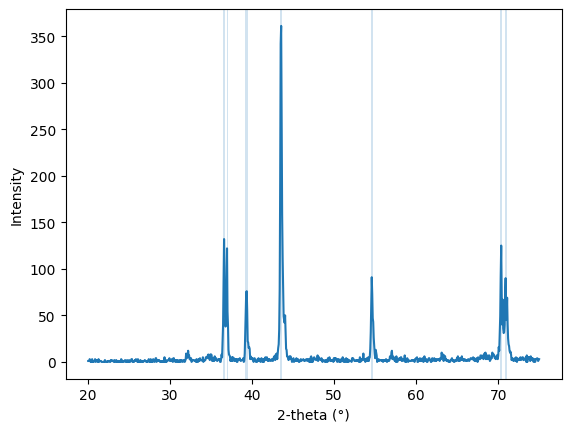

,2theta,d_spacing,FWHM,Grain_size (D),h,k,l,(h^2+k^2+l^2),root,abc
0,36.590000,2.453891,0.240000,7.195286,0,0,2,4,2.000000,4.907782
1,36.950000,2.430805,0.120000,14.458299,1,0,0,1,1.000000,2.430805
2,39.350000,2.287899,0.300000,5.976822,1,0,1,2,1.414214,3.235578
3,43.550000,2.076489,0.300000,6.376890,1,0,2,5,2.236068,4.643171
4,54.590000,1.679780,0.300000,7.976550,1,1,0,2,1.414214,2.375567
5,70.370000,1.336820,0.240000,17.197022,1,1,2,6,2.449490,3.274526
6,70.910000,1.327958,0.240000,17.664570,2,0,1,5,2.236068,2.969405


In [237]:
from scipy.signal import find_peaks
from math import pi, cos

# Load XRD data from CSV file
xrd_data = data

# Plot XRD pattern
plt.plot(xrd_data['Angle (2theta)'], xrd_data['Intensity (Counts)'])
plt.xlabel('2-theta (°)')
plt.ylabel('Intensity')

# Find peaks
peaks, _ = find_peaks(xrd_data['Intensity (Counts)'], height=70)

#save fwhm and grain size in new list
FWHM=[]
Grain_size_D=[]

for peak_index in peaks:
    # Find left and right indices where intensity drops to half of the maximum
    half_max_height = xrd_data['Intensity (Counts)'][peak_index] / 2
    left_index = peak_index - 1
    while xrd_data['Intensity (Counts)'][left_index] > half_max_height:
        left_index -= 1
    right_index = peak_index + 1
    while xrd_data['Intensity (Counts)'][right_index] > half_max_height:
        right_index += 1
    
    # Calculate FWHM
    fwhm = xrd_data['Angle (2theta)'][right_index] - xrd_data['Angle (2theta)'][left_index]
    #print('Peak at', xrd_data['Angle (2theta)'][peak_index], 'degrees')
    FWHM.append(fwhm)
    #print('FWHM:', fwhm)
    
    # Calculate grain size using Scherrer's formula
    k = 0.9 # shape factor
    lambda_ = 1.5406 # wavelength of X-ray (in Angstrom)
    theta = xrd_data['Angle (2theta)'][peak_index] * pi / 180 # convert to radians
    grain_size = k * lambda_ / (cos(theta) * fwhm) # in nanometers
    Grain_size_D.append(grain_size)
    #print('Grain size:', grain_size, 'nm')
    
    # Highlight peak on XRD plot
    plt.axvspan(xrd_data['Angle (2theta)'][left_index], xrd_data['Angle (2theta)'][right_index], alpha=0.2)
    
plt.show()
df.insert(loc=2,column='FWHM',value=FWHM)
df.insert(loc=3,column='Grain_size (D)',value=Grain_size_D)
# Define the style for index column
styled_df = df.style.set_properties(subset=pd.IndexSlice[:, ['FWHM','Grain_size (D)']], 
                                     **{'background-color': 'yellow'})

# Display the formatted dataframe
display(styled_df)


**Baseline correction**

In [255]:
import pandas as pd

# Read the CSV file and store it in a dataframe
df = pd.read_csv(r'C:\Users\HP\Downloads\bfo_xrd1.csv')


         20  286
0     20.02  286
1     20.04  281
2     20.06  276
3     20.08  305
4     20.10  302
...     ...  ...
2995  79.92  233
2996  79.94  219
2997  79.96  240
2998  79.98  254
2999  80.00  212

[3000 rows x 2 columns]


In [274]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
import pandas as pd

In [287]:

# Load the XRD data from a CSV file
xrd_data = data
x = data.iloc[:,0]
y = data.iloc[:,1]

# Extract the X and Y data from the CSV file

# Apply the Savitzky-Golay filter to smooth the data and estimate the baseline
baseline = savgol_filter(y, 100, 2)

# Subtract the baseline from the original data to obtain the adjusted data
adjusted_data = y - baseline

# Save the adjusted data to a new CSV file
adjusted_data_df = pd.DataFrame({'X': x, 'Y': adjusted_data})
adjusted_data_df.to_csv('adjusted_xrd_data.csv', index=False)


In [276]:
base_data=pd.read_csv(r'C:\Users\HP\Downloads\adjusted_xrd_data.csv')
base_data

,X,Y
0,20.02,-31.074438
1,20.04,-36.611751
2,20.06,-42.138685
3,20.08,-13.655242
4,20.10,-17.161420
...,...,...
2995,79.92,7.370522
2996,79.94,-6.487265
2997,79.96,14.658339
2998,79.98,28.807334


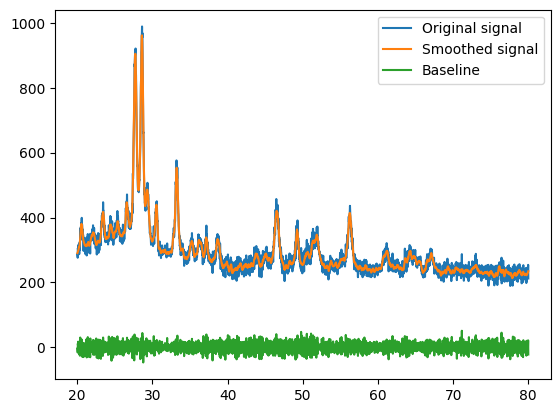

In [291]:

# Apply Savitzky-Golay filter to smooth the data
y_smooth = savgol_filter(y, window_length=21, polyorder=2)

# Subtract the smoothed signal from the original signal to obtain the baseline
baseline = y - y_smooth

# Plot the original signal and the baseline-corrected signal
import matplotlib.pyplot as plt
plt.plot(x, y, label='Original signal')
plt.plot(x, y_smooth, label='Smoothed signal')
plt.plot(x, baseline, label='Baseline')
plt.legend()
plt.show()

# Save the baseline-corrected data to a new CSV file
data['Baseline'] = baseline
data['y_smooth']=y_smooth
data.to_csv('xrd_data_baseline_corrected.csv', index=False)


In [292]:
peaks, _ = find_peaks(y, height=230, distance=50)
baseline = savgol_filter(y, window_length=51, polyorder=3)
y_flat = y - baseline


**Data plot after correction of baseline**

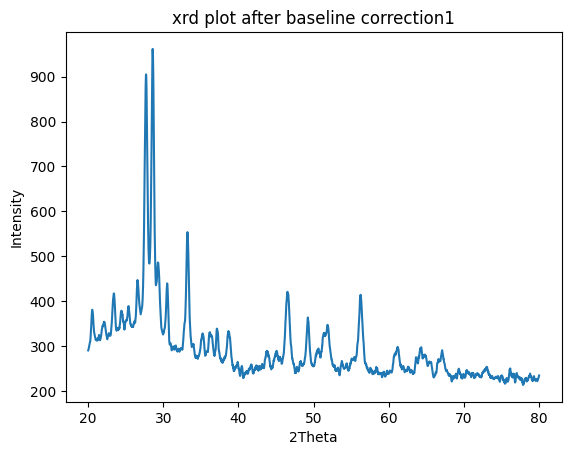

In [325]:
plt.plot(x, y_smooth, label='Smoothed signal')
plt.title('xrd plot after baseline correction1')
plt.xlabel("2Theta")
plt.ylabel("Intensity")
plt.show()
baseline = savgol_filter(y_smooth, window_length=250, polyorder=2)
y_data_corrected = y_smooth - baseline


In [ ]:
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.0/515.0 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 35.8 MB/s eta 0:00:00


In [9]:
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

with MPRester(api_key='ygczzVeeUPfPlnBGRhMxZ0dRZWcX75df') as mpr:
    # first retrieve the relevant structure
    structure = mpr.get_structure_by_material_id('mp-79')

# important to use the conventional structure to ensure
# that peaks are labelled with the conventional Miller indices
sga = SpacegroupAnalyzer(structure)
conventional_structure = sga.get_conventional_standard_structure()

# this example shows how to obtain an XRD diffraction pattern
# these patterns are calculated on-the-fly from the structure
calculator = XRDCalculator(wavelength='CuKa')
pattern = calculator.get_pattern(conventional_structure)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mp_api\client\mprester.py:147: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


MPRestError: HTTPSConnectionPool(host='api.materialsproject.org', port=443): Max retries exceeded with url: /materials/?deprecated=False&_fields=material_id&task_ids=mp-79&_limit=1000 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F2DA6B6A10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [305]:
pattern

DiffractionPattern
$2\Theta$: [36.89000473 39.81431701 44.10456105 55.39518347 71.4791533  72.27969535
 78.51230026 84.02122503 85.8427416  88.71408618]
Intensity: [ 37.27656114  22.51094754 100.          16.40157294  21.73371872
  14.00057617   3.65531482  18.30605221   2.17192822  12.09650591]

In [306]:
from mp_api.client import MPRester

with MPRester(api_key='ygczzVeeUPfPlnBGRhMxZ0dRZWcX75df') as mpr:
    surface_properties_doc = mpr.surface_properties.get_data_by_id('mp-79')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mp_api\client\mprester.py:147: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SurfacePropDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [308]:
surface_properties_doc

MPDataDoc<SurfacePropDoc>(
surfaces=[SurfaceEntry(miller_index=[2, -1, -1, 2], surface_energy_EV_PER_ANG2=0.049858712834864614, surface_energy=0.7988246101579123, is_reconstructed=False, structure="# generated using pymatgen\ndata_Zn\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.59376062\n_cell_length_b   5.66297186\n_cell_length_c   28.26609457\n_cell_angle_alpha   82.19687645\n_cell_angle_beta   90.00000937\n_cell_angle_gamma   90.00000940\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Zn\n_chemical_formula_sum   Zn24\n_cell_volume   728.51493978\n_cell_formula_units_Z   24\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Zn  Zn1  1  0.663833  0.070876  0.393521  1\n  Zn  Zn2  1  0.665003  0.547588  0.140193  1\n  Zn  Zn3  1  0.241334  0.021849  0.

In [315]:
mpr.get_structures
structure

Structure Summary
Lattice
    abc : 2.61436012 2.614359482682322 4.87316102
 angles : 90.0 90.0 119.99998275785532
 volume : 28.845108913918352
      A : 2.61436012 0.0 0.0
      B : -1.30717906 2.26410212 0.0
      C : 0.0 -0.0 4.87316102
    pbc : True True True
PeriodicSite: Zn (-0.0000, 1.5094, 1.2183) [0.3333, 0.6667, 0.2500]
PeriodicSite: Zn (1.3072, 0.7547, 3.6549) [0.6667, 0.3333, 0.7500]

In [12]:
mpr.get_structures('Zn')

MPRestError: HTTPSConnectionPool(host='api.materialsproject.org', port=443): Max retries exceeded with url: /materials/?deprecated=False&_fields=structure&formula=Zn&_limit=1000 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F2DCF972B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [2]:
!pip install crystal_toolkit --user

ERROR: Could not find a version that satisfies the requirement crystal_toolkit (from versions: none)
ERROR: No matching distribution found for crystal_toolkit


In [1]:
from crystal_toolkit import view

ModuleNotFoundError: No module named 'crystal_toolkit'

In [7]:
from pymatgen import Lattice

ImportError: cannot import name 'Lattice' from 'pymatgen' (unknown location)

In [13]:
Lattice.from_parameters(5,5,5,90,90,90)

NameError: name 'Lattice' is not defined

In [22]:
from pymatgen.core import Lattice, Structure

We can create latttice

In [17]:
Lattice_1=Lattice.from_parameters(5,5,5,90,90,90)

In [18]:
Lattice_1

Lattice
    abc : 5.0 5.0 5.0
 angles : 90.0 90.0 90.0
 volume : 125.0
      A : 5.0 0.0 3.061616997868383e-16
      B : 8.040613248383183e-16 5.0 3.061616997868383e-16
      C : 0.0 0.0 5.0
    pbc : True True True

In [23]:
bcc_fe=Structure(Lattice.cubic(2.64),['Fe','Fe'],[[0,0,0],[1,1,1]])

In [24]:
bcc_fe

Structure Summary
Lattice
    abc : 2.64 2.64 2.64
 angles : 90.0 90.0 90.0
 volume : 18.399744000000002
      A : 2.64 0.0 0.0
      B : 0.0 2.64 0.0
      C : 0.0 0.0 2.64
    pbc : True True True
PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Fe (2.6400, 2.6400, 2.6400) [1.0000, 1.0000, 1.0000]

In [25]:
bcc_fe.volume

18.399744000000002

In [26]:
bcc_fe.atomic_numbers

(26, 26)

In [27]:
bcc_fe.composition

Comp: Fe2

In [56]:
bcc_fe.add_oxidation_state_by_element

<bound method SiteCollection.add_oxidation_state_by_element of Structure Summary
Lattice
    abc : 2.64 2.64 2.64
 angles : 90.0 90.0 90.0
 volume : 18.399744000000002
      A : 2.64 0.0 0.0
      B : 0.0 2.64 0.0
      C : 0.0 0.0 2.64
    pbc : True True True
PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Fe (2.6400, 2.6400, 2.6400) [1.0000, 1.0000, 1.0000]>

In [71]:
nacl1=Structure.from_spacegroup('Fm-3m',Lattice.cubic(5.6),['Na+','Cl-'],[[0,0,0],[0.5,0.5,0.5]])

In [72]:
print(nacl1)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.600000   5.600000   5.600000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na+   0    0    0
  1  Na+   0.5  0.5  0
  2  Na+   0.5  0    0.5
  3  Na+   0    0.5  0.5
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0    0    0.5
  6  Cl-   0    0.5  0
  7  Cl-   0.5  0    0


In [52]:
nacl1.get_space_group_info()

('Fm-3m', 225)

In [57]:
composition={'Cu':0.5,'Au':0.5}
cu_au=Structure.from_spacegroup('Fm-3m',Lattice.cubic(4.677),[composition],[[0,0,0]])

In [58]:
cu_au

Structure Summary
Lattice
    abc : 4.677 4.677 4.677
 angles : 90.0 90.0 90.0
 volume : 102.30623673299998
      A : 4.677 0.0 0.0
      B : 0.0 4.677 0.0
      C : 0.0 0.0 4.677
    pbc : True True True
PeriodicSite: Cu:0.500, Au:0.500 (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cu:0.500, Au:0.500 (2.3385, 2.3385, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cu:0.500, Au:0.500 (2.3385, 0.0000, 2.3385) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cu:0.500, Au:0.500 (0.0000, 2.3385, 2.3385) [0.0000, 0.5000, 0.5000]

In [61]:
nacl1_repeated=nacl1*(2,2,2)
nacl1_repeated

Structure Summary
Lattice
    abc : 11.2 11.2 11.2
 angles : 90.0 90.0 90.0
 volume : 1404.9279999999997
      A : 11.2 0.0 0.0
      B : 0.0 11.2 0.0
      C : 0.0 0.0 11.2
    pbc : True True True
PeriodicSite: Na+ (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Na+ (0.0000, 0.0000, 5.6000) [0.0000, 0.0000, 0.5000]
PeriodicSite: Na+ (0.0000, 5.6000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Na+ (0.0000, 5.6000, 5.6000) [0.0000, 0.5000, 0.5000]
PeriodicSite: Na+ (5.6000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Na+ (5.6000, 0.0000, 5.6000) [0.5000, 0.0000, 0.5000]
PeriodicSite: Na+ (5.6000, 5.6000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Na+ (5.6000, 5.6000, 5.6000) [0.5000, 0.5000, 0.5000]
PeriodicSite: Na+ (2.8000, 2.8000, 0.0000) [0.2500, 0.2500, 0.0000]
PeriodicSite: Na+ (2.8000, 2.8000, 5.6000) [0.2500, 0.2500, 0.5000]
PeriodicSite: Na+ (2.8000, 8.4000, 0.0000) [0.2500, 0.7500, 0.0000]
PeriodicSite: Na+ (2.8000, 8.4000, 5.6000) [0.2500, 0

In [65]:
nacl1.volume/ nacl1_repeated.volume

0.125

In [66]:
nacl1.replace(0,'I')

replace the Na site with 'I' element at position 0

In [67]:
nacl1

Structure Summary
Lattice
    abc : 5.6 5.6 5.6
 angles : 90.0 90.0 90.0
 volume : 175.61599999999996
      A : 5.6 0.0 0.0
      B : 0.0 5.6 0.0
      C : 0.0 0.0 5.6
    pbc : True True True
PeriodicSite: I (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Na+ (2.8000, 2.8000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Na+ (2.8000, 0.0000, 2.8000) [0.5000, 0.0000, 0.5000]
PeriodicSite: Na+ (0.0000, 2.8000, 2.8000) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cl- (2.8000, 2.8000, 2.8000) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cl- (0.0000, 0.0000, 2.8000) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cl- (0.0000, 2.8000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cl- (2.8000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]

In [69]:
nacl1.translate_sites([0],[0,0.1,0])
nacl1

Structure Summary
Lattice
    abc : 5.6 5.6 5.6
 angles : 90.0 90.0 90.0
 volume : 175.61599999999996
      A : 5.6 0.0 0.0
      B : 0.0 5.6 0.0
      C : 0.0 0.0 5.6
    pbc : True True True
PeriodicSite: I (0.0000, 1.1200, 0.0000) [0.0000, 0.2000, 0.0000]
PeriodicSite: Na+ (2.8000, 2.8000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Na+ (2.8000, 0.0000, 2.8000) [0.5000, 0.0000, 0.5000]
PeriodicSite: Na+ (0.0000, 2.8000, 2.8000) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cl- (2.8000, 2.8000, 2.8000) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cl- (0.0000, 0.0000, 2.8000) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cl- (0.0000, 2.8000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cl- (2.8000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]

above info we can see we alter the position of I in the sructure

In [70]:
print(nacl1)

Full Formula (Na3 I1 Cl4)
Reduced Formula: Na3ICl4
abc   :   5.600000   5.600000   5.600000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  I     0    0.2  0
  1  Na+   0.5  0.5  0
  2  Na+   0.5  0    0.5
  3  Na+   0    0.5  0.5
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0    0    0.5
  6  Cl-   0    0.5  0
  7  Cl-   0.5  0    0


In [76]:
import pymatgen as pmg

In [89]:
pmg.vis.structure_vtk.v

<function pymatgen.vis.structure_vtk.StructureVis.show(self)>

NameError: name 'vis' is not defined

In [1]:
!create env dddd

'create' is not recognized as an internal or external command,
operable program or batch file.
